## DAB200 -- Graded Lab 1

In this lab, you will gain some experience in **denoising** a dataset in the context of a specific objective. 

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

**Data set**: make sure you use the data with the same number as your group number!

| Group | Data set |
| :-: | :-: |
| 1 | rent_1.csv |
| 2 | rent_2.csv |
| etc. | etc. |

**Important Notes:**
 - This lab is more open-ended so be prepared to think on your own, in a logical way, in order to solve the problem at hand
     - You should be able to support any decision you make with logical evidence
 - The data looks like the data we have been using in class but it has other **surprises**
     - Be sure to investigate the data in a way that allows you to discover all these surprises
 - Use [Chapter 5](https://mlbook.explained.ai/prep.html) of the textbook as a **guide**, except:
     - you only need to use **random forest** models;
     - exclude Section 5.5; 
 - Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
 - Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
 - Don't make assumptions!

I have broken the lab down into 4 main parts. 

### Part 0

Please provide the following information:
 - Group Number: 11
 - Group Members
     - Ruturajsinh Solanki 0827884
     - Crish Chhotai 0826416
     - Isha Dhaduk 0827577

     

### Part 1 - Create and evaluate an initial model

#### Code (15 marks)

In [2]:
import pandas as pd      
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('rent_11.csv')
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address,interest_level,num_desc_words,num_photos
0,1.0,0,c94301249b8c09429d329864d58e5b82,2016-04-18 11:44:15,"Amazing, bright and spacious studio/convertibl...",Gold Street,"['Common Outdoor Space', 'Cats Allowed', 'Dogs...",40.7076,-74.0080,c25515933b3ecbb28e56e0c7f030f58c,['https://photos.renthop.com/2/6890979_d2087d7...,2659,2 Gold Street,low,88,12
1,1.0,4,1edde1c89233fb1b1a38c53e992b0756,2016-06-28 06:22:08,!!!!!!!!AVAILABLE NOW!!!!!!ALL UTILITIES INCLU...,1st Ave.,"['Dishwasher', 'Hardwood Floors', 'Outdoor Spa...",40.7317,-73.9821,54bf50a3e709c0bd499f9fdca5826147,['https://photos.renthop.com/2/7227168_53e6c29...,5850,252 1st Ave.,low,147,7
2,1.0,2,ed6404b04d582f393f7ea49ce192c84e,2016-06-17 04:57:26,**2BR Duplex**Private Balcony**UES\r<br>\rMust...,East 82nd Street,"['Cats Allowed', 'Private Outdoor Space', 'Dog...",40.7747,-73.9517,30c0cca4c570c11ae411e0e80f3d5698,['https://photos.renthop.com/2/7176706_9140e0e...,2995,349 East 82nd Street,low,51,4
3,2.0,2,1b7af8bb79c3ce6ef14c661e972e36b8,2016-06-14 11:50:34,Elegant 2 Bedroom/2 Bath apartment in a full s...,E 102 St.,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7874,-73.9420,7b392b11d691f65a71e58a3f76aaf04e,['https://photos.renthop.com/2/7157119_7ccb112...,3345,333 E 102 St.,low,116,4
4,1.0,3,b8e75fc949a6cd8225b455648a951712,2016-04-19 03:57:46,BRAND NEW GUT RENOVATED 3 BEDROOM<br /...,230 East 44th Street,"['Doorman', 'Elevator', 'Fitness Center', 'No ...",40.7513,-73.9721,5f32d96f2efd93984b4e9e16bcdab904,['https://photos.renthop.com/2/6894356_a633a9c...,4921,230 East 44th Street,medium,169,6


In [6]:
df.shape[1]

16

In [10]:
df.groupby(['price']).mean().reset_index()

,price,bathrooms,bedrooms,latitude,longitude,num_desc_words,num_photos
0,-55000,4.0,4.0,40.7608,-73.97740,485.0,1000000.0
1,-15000,3.0,3.0,40.7568,-73.98675,104.0,6.5
2,-13875,3.0,3.0,44.8835,-93.27050,98.0,8.0
3,-13490,3.0,3.0,40.7754,-73.95020,100.0,1.0
4,-11500,3.0,5.0,40.7731,-73.94590,129.0,5.0
...,...,...,...,...,...,...,...
2043,60000,7.0,5.0,40.7335,-73.99740,222.0,8.0
2044,80000,3.0,3.0,40.7565,-73.97260,307.0,6.0
2045,85000,5.0,4.0,40.7161,-74.00800,370.0,13.0
2046,90000,3.0,3.0,40.7565,-73.97260,303.0,7.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        20000 non-null  float64
 1   bedrooms         20000 non-null  int64  
 2   building_id      20000 non-null  object 
 3   created          20000 non-null  object 
 4   description      19383 non-null  object 
 5   display_address  19949 non-null  object 
 6   features         20000 non-null  object 
 7   latitude         20000 non-null  float64
 8   longitude        20000 non-null  float64
 9   manager_id       20000 non-null  object 
 10  photos           20000 non-null  object 
 11  price            20000 non-null  int64  
 12  street_address   19998 non-null  object 
 13  interest_level   20000 non-null  object 
 14  num_desc_words   20000 non-null  int64  
 15  num_photos       20000 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 2.4+ MB


In [213]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,num_desc_words,num_photos
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.213250,1.543600,37.510039,-66.432797,3497.492400,87.489600,24555.508150
std,0.500562,1.112098,14.405199,39.506637,2852.676672,58.845257,154752.138833
min,0.000000,0.000000,-33.201000,-118.271000,-55000.000000,0.000000,1.000000
25%,1.000000,1.000000,40.723900,-73.990900,2450.000000,48.000000,4.000000
50%,1.000000,1.000000,40.748700,-73.976000,3100.000000,81.000000,5.000000
75%,1.000000,2.000000,40.772800,-73.952300,4050.000000,118.000000,7.000000
max,7.000000,7.000000,44.883500,178.387800,111111.000000,507.000000,1000000.000000


In [268]:
X = df[['bathrooms', 'bedrooms', 'latitude', 'longitude', 'num_desc_words', 'num_photos']]
y = df[['price']]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20000, 6)
Shape of y: (20000, 1)


In [221]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, oob_score = True) 

In [222]:
rf.fit(X.values, y.values)

RandomForestRegressor(n_estimators=10, oob_score=True)

In [223]:
r2_score = rf.score(X, y)
print("R-Squared Score: {}".format(r2_score))

R-Squared Score: 0.8864154281739663


In [224]:
rf.oob_score_

0.2109732637697942

In [269]:
oob_score = []
for i in range(1, 11):
    rf = RandomForestRegressor(n_estimators = i, oob_score = True, random_state = 11)
    rf.fit(X, y)
    err = rf.oob_score_
    oob_score.append(err)
oob_score

[-0.9018615366223435,
 -0.554346579847742,
 -0.22823340125996672,
 -0.07410742759887357,
 0.06268051983818612,
 0.12746251701478706,
 0.15367738208289194,
 0.1868433681546623,
 0.2475934161069946,
 0.2494588056531002]

In [246]:
r2_init = []
oob_init = []
mae_init = []

for i in range(90,101):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest Classifier object
    Regressor = RandomForestRegressor(n_estimators=i, random_state=69, oob_score = True)

    # Train the model on the training data
    Regressor.fit(X_train.values, y_train.values)

    # Make predictions on the testing data
    y_pred = Regressor.predict(X_test)
    
    r2_init.append(Regressor.score(X_train, y_train))
    oob_init.append(Regressor.oob_score_)
    mae_init.append(mean_absolute_error(Regressor.predict(X_test), y_test))

print("R-Squared score: {} \nOut of bag Score: {} \nMean Absolute Error: {}".format(np.mean(r2_init),np.mean(oob_init),np.mean(mae_init)))

R-Squared score: 0.905912289136899 
Out of bag Score: 0.3481580955434042 
Mean Absolute Error: 783.7905288648784


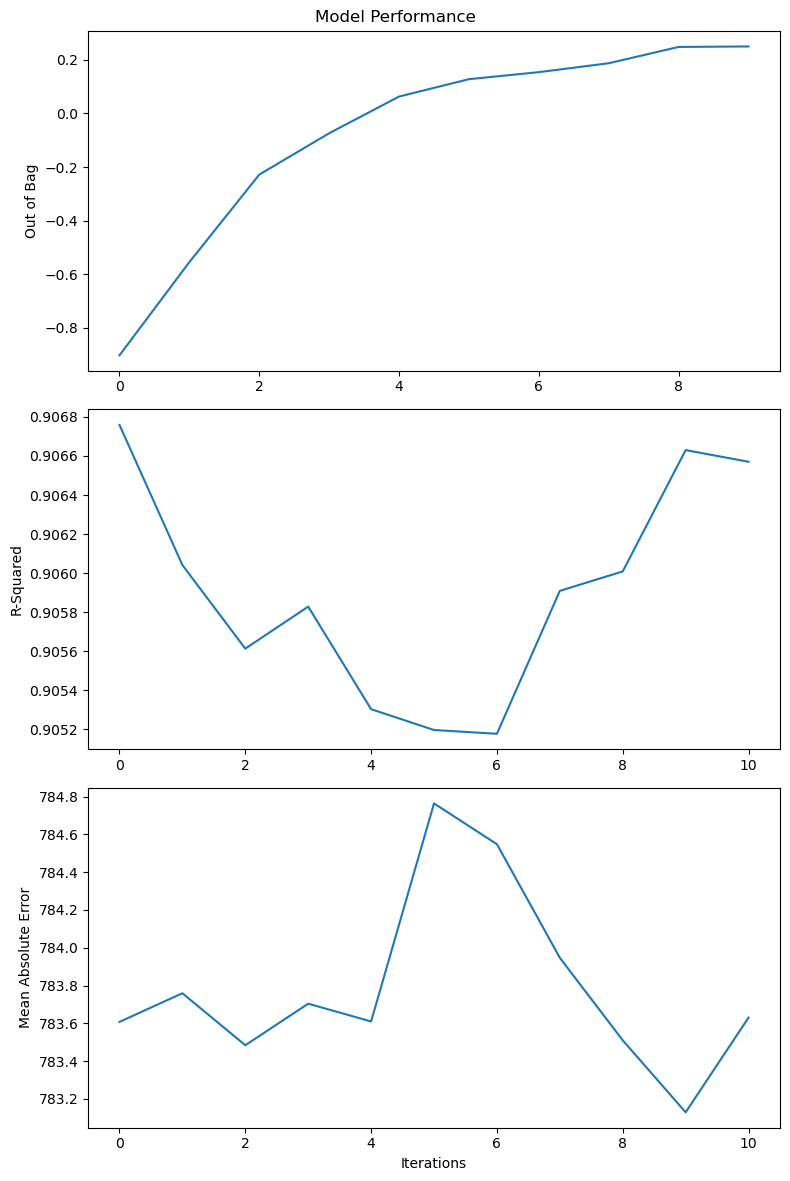

In [270]:
# Create subplots with 3 rows
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot oob_init in the first row
axs[0].plot(oob_score)
axs[0].set_ylabel('Out of Bag')

# Plot r2_init in the second row
axs[1].plot(r2_init)
axs[1].set_ylabel('R-Squared')

# Plot mae_init in the third row
axs[2].plot(mae_init)
axs[2].set_ylabel('Mean Absolute Error')

# Add x-axis label to the last row
axs[2].set_xlabel('Iterations')

# Add a title to the plot
plt.suptitle('Model Performance')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


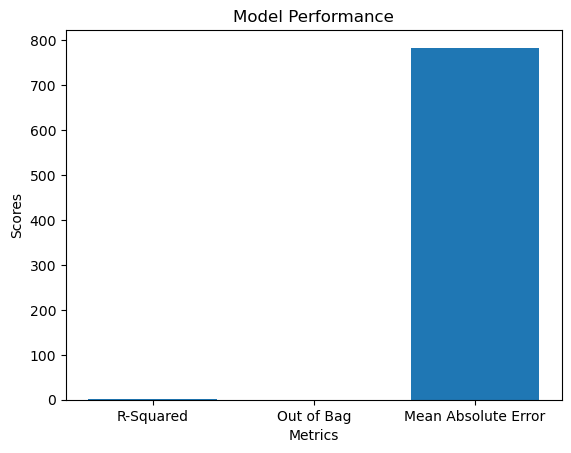

In [242]:
# Calculate the average values
mean_r2 = np.mean(r2_init)
mean_oob = np.mean(oob_init)
mean_mae = np.mean(mae_init)

# Plot the findings
labels = ['R-Squared', 'Out of Bag', 'Mean Absolute Error']
values = [mean_r2, mean_oob, mean_mae]

plt.bar(labels, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance')
plt.show()


In [227]:
N = 10

r2_agg_raw = []
oob_agg_raw = []
mae_agg_raw = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) ## 20% Data for test
    rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    rfr.fit(X_train, y_train)
    
    r2_agg_raw.append(rfr.score(X_train, y_train))
    oob_agg_raw.append(rfr.oob_score_)
    mae_agg_raw.append(mean_absolute_error(rfr.predict(X_test), y_test))
    
print("R-Squared score: {} \nOut of bag Score: {} \nMean Absolute Error: {}".format(np.mean(r2_agg_raw),np.mean(oob_agg_raw),np.mean(mae_agg_raw)))

R-Squared score: 0.9031884992252948 
Out of bag Score: 0.35726517983277767 
Mean Absolute Error: 810.3207843864197


In [186]:
errors = []
print(f"Validation MAE trials:", end='')
for i in range(10):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $824 $785 $816 $851 $845 $836 $861 $783 $834 $853
Average validation MAE $829


In [187]:
predictions = Regressor.predict(X_train)

mae_train = mean_absolute_error(y_train, predictions)

print(f"${mae_train:.0f} average training error")

ValueError: X has 6 features, but RandomForestRegressor is expecting 4 features as input.

In [141]:
Validation_predictions = Regressor.predict(X_test)

mae = mean_absolute_error(y_test, Validation_predictions)

print(f"${mae:.0f} average validation error")

$792 average validation error


#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 1** in the context of the overall objective. 

##### Initial Steps

* For Regression models, we need numeric values and also the values cannot be NULL.
* To ensure we meet these two rules we do the following:

    * We want to subset the features that are numeric and ones that could have a significant impact on the target variable. In our case, it would be the following features:
        * bedrooms
        * bathrooms
        * latitude
        * longitude
        * num_desc_words
        * num_photos
        
    * We will not be considering the catagorical columns(features):
        * building_id
        * created
        * description
        * display_address
        * features
        * manager_id
        * photos
        * street_address
        * interest_level
   
    * Since we meet the two criteria we proceed to create a model
    
##### Modeling

* First, we trained 10 random forest regressor models using our whole dataset, and found the oob scores for each of them.
    * It can be said from the scores that our models are performing very poorly on the given dataset.
* After the initial training, we split our data into 80, 20 percent, where 80 percent is for training and other 20 for testing.
    * We again trained 10 random forest regressor models using train test split.
    * As we can see the Mean Absolute Error is also very high which suggest that our models are performing poorly.
    


### Part 2 - Denoise the data

This section should only include the code necessary to **denoise** the data, NOT the code necessary to identify inconsistencies, problems, errors, etc. in the data. 

#### Code (25 marks)

In [142]:
print(df['bathrooms'].unique())
print(df['bedrooms'].unique())

[1.  2.  0.  3.  1.5 4.5 3.5 4.  2.5 5.  6.  5.5 7. ]
[0 4 2 3 1 5 6 7]


In [143]:
df.sort_values('price', ascending=True).head(10)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address,interest_level,num_desc_words,num_photos
1015,4.0,4,33a3edc450389cb22003e9b62cba0214,2016-05-14 02:18:40,"The New Crown Jewel of Manhattan, The Baccarat...",West 53rd Street,"['Doorman', 'Elevator', 'Dogs Allowed', 'Cats ...",40.7608,-73.9774,1ecd9c2982bf73c3108f806f4ee89098,['https://photos.renthop.com/2/7009946_94c69dc...,-55000,20 West 53rd Street,low,485,1000000
12773,3.0,3,4536d999c24c6f4723a5c1ce3e17860b,2016-05-22 02:37:57,CooperCooper.com :: Web ID #181293; Access 100...,Horatio Street,"['Doorman', 'Fitness Center', 'Elevator', 'Pub...",40.7388,-74.0084,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7051978_de88d1c...,-15000,95 Horatio Street,low,116,6
11073,3.0,3,49ae77ede3dbc66049f796dc8efacfe6,2016-06-01 03:13:54,FIFTH AVENUE AND 70s. - LOCATION DOESN'T GET A...,5th Ave.,"['Dining Room', 'Doorman', 'Elevator', 'Laundr...",40.7748,-73.9651,c9c33695ee2a2f818e9f1d8f7d1c4b39,['https://photos.renthop.com/2/7089461_ac3512f...,-15000,945 5th Ave.,low,92,7
11922,3.0,3,cca9ed74339903b6d9c876a8e608d75b,2016-05-19 02:11:21,"DYNAMIC DUPLEX!!!! Incredible 3 Bedroom, 3.5 B...","E 66th St, New York","['Fitness Center', 'Renovated', 'Walk in Close...",44.8835,-93.2705,223268168dc5049485bd70a19596730e,['https://photos.renthop.com/2/7035661_e224f45...,-13875,"400 E 66th St,New York",low,98,8
17457,3.0,3,29b949ddb15f5b570c7e993b2af95836,2016-04-02 05:46:06,Manhattan's true showcase addresses for Upper ...,East 84th Street,"['Swimming Pool', 'Elevator', 'Fitness Center']",40.7754,-73.9502,7e77f82ffcd8bfadad6e14d1e1c13ab0,[],-13490,400 East 84th Street,low,100,1
7529,3.0,5,3a61bfed43de538e195ed9b4f2f15c9e,2016-06-17 02:12:29,No Fee! Advertised rent is the NET effective r...,85 East End Avenue,"['Balcony', 'Doorman', 'Elevator', 'Laundry in...",40.7731,-73.9459,0df0f5abf295e29f6ee8b881a13f08ca,['https://photos.renthop.com/2/7174899_7b83bc1...,-11500,85 East End Avenue,low,129,5
6300,1.0,0,7506991bf1cbae8ea366824988f7c420,2016-04-12 05:55:19,Currently built out with a Duplex type office/...,W 26th St.,"['Roof Deck', 'Doorman', 'Elevator', 'Fitness ...",40.7517,-74.0076,710919c336e00a39ba631c45a3258536,['https://photos.renthop.com/2/6861490_6cdcfe6...,-11340,601 W 26th St.,low,133,8
6328,3.0,3,692f52e5a1380dae520e7857744b38d3,2016-04-11 02:49:08,"INCREDIBLE, Rare Deal for a Luxury, white glov...",E 34th St.,"['Roof Deck', 'Dining Room', 'Doorman', 'Eleva...",40.7454,-73.9776,1b737c5bd2a1bbb11388e502a2c5447b,['https://photos.renthop.com/2/6855165_68a59bf...,-11077,222 E 34th St.,low,157,12
840,2.0,3,bcdcd32a3fa39609967b09cc38b42a16,2016-05-17 02:46:44,AMAZING 3 BED 2 BATH LOCATED IN THE AMAZING EA...,E 9 Street,[],40.7286,-73.9856,9daa743d34f2bf6917a2ce0c1716784f,['https://photos.renthop.com/2/7021908_9c2132f...,-11000,335 E 9 Street,medium,55,5
4818,3.5,3,d3a565182adf8bd9c5b033bb12757366,2016-05-20 04:20:07,Stunning 3 bedroom 3.5 bathroom luxurious apar...,W 67th St.,"['Roof Deck', 'Dining Room', 'Balcony', 'Doorm...",40.7756,-73.9846,ad3d8ddc52c7e0859b5c6c7f7949c3bd,['https://photos.renthop.com/2/7042864_443415d...,-11000,200 W 67th St.,low,130,6


In [284]:
print(sum(df['bathrooms'] >= 4))
print(sum(df['bedrooms'] > 4 ))
print(sum(df['price'] > q3))
print(sum(df['price'] < q1))

80
106
576
3910


In [292]:
q3, q1 = np.percentile(df['bathrooms'], [75, 20])
print(q3, q1)

1.0 1.0


In [146]:
df = df[['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price']]

In [288]:
count_bathrooms_zero = 0
count_latitude_negative = 0
count_longitude_positive = 0
count_price_gt_q3 = 0

for index, row in df.iterrows():
    if row['bathrooms'] == 0:
        count_bathrooms_zero += 1
    if row['latitude'] < 40.5500 or row['latitude'] > 40.9400:
        count_latitude_negative += 1
    if row['longitude'] < -74.1000 or row['longitude'] > -73.6700:
        count_longitude_positive += 1
    if row['price'] >= q3 or row['price'] <= q1:
        count_price_gt_q3 += 1

print("Count of bathrooms with 0 value:", count_bathrooms_zero)
print("Count of latitude values <= 0:", count_latitude_negative)
print("Count of longitude values >= 0:", count_longitude_positive)
print("Count of over priced values <= 0:", count_price_gt_q3)

Count of bathrooms with 0 value: 116
Count of latitude values <= 0: 991
Count of longitude values >= 0: 990
Count of over priced values <= 0: 5173


In [148]:
sum(df['bathrooms'].isin([1,2,3,4]))

19453

In [290]:
# Create boolean masks for the conditions
bathrooms_zero_mask = ~df['bathrooms'].isin([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
bedrooms_zero_mask = ~df['bedrooms'].isin([0,1,2,3,4])
latitude_negative_mask = (df['latitude'] < 40.5500) | (df['latitude'] > 40.9400)
longitude_positive_mask = (df['longitude'] < -74.1000) | (df['longitude'] > -73.6700)
price_negative_mask = (df['price'] < q1) | (df['price'] > q3)

# Apply the masks to filter the DataFrame
df_filtered = df[~(bathrooms_zero_mask | latitude_negative_mask | longitude_positive_mask | price_negative_mask | bedrooms_zero_mask)]

# Print the filtered DataFrame
print(df_filtered)


       bathrooms  bedrooms                       building_id  \
0            1.0         0  c94301249b8c09429d329864d58e5b82   
1            1.0         4  1edde1c89233fb1b1a38c53e992b0756   
2            1.0         2  ed6404b04d582f393f7ea49ce192c84e   
3            2.0         2  1b7af8bb79c3ce6ef14c661e972e36b8   
4            1.0         3  b8e75fc949a6cd8225b455648a951712   
...          ...       ...                               ...   
19993        2.0         3  6e9fa9993c3d9679d3a21ebe89d3aeef   
19994        1.0         3  263285dadae1eb73351df8edca92ff0a   
19997        1.0         1                                 0   
19998        1.0         2  46b5fd6e1ed6d002f5e6557f7e25bce1   
19999        1.0         0                                 0   

                   created                                        description  \
0      2016-04-18 11:44:15  Amazing, bright and spacious studio/convertibl...   
1      2016-06-28 06:22:08  !!!!!!!!AVAILABLE NOW!!!!!!ALL UTILITIES 

In [150]:
X.drop(columns = ['num_desc_words', 'num_photos'], inplace = True)


In [151]:
count = 0
for i in X['bathrooms']:
    if i == 0:
        count += 1
print(count)

116


In [152]:
count = 0
for i in X['latitude']:
    if i <= 0:
        count += 1
print(count)

977


In [153]:
count = 0
for i in X['longitude']:
    if i >= 0:
        count += 1
print(count)

485


In [154]:
count = 0
for i in df['price']:
    if i < 0:
        print(i)
        count += 1
print(count)

-2695
-5250
-2575
-2795
-3400
-2190
-3395
-2300
-3345
-6495
-2900
-1750
-2600
-1885
-2150
-3200
-11000
-3095
-2000
-3300
-55000
-2750
-1800
-1995
-2350
-4500
-4295
-2995
-3080
-4500
-6000
-1500
-3600
-3450
-3900
-4000
-2495
-7460
-2050
-2799
-2000
-2900
-2775
-4800
-6795
-4400
-4200
-4095
-2500
-3500
-2900
-2700
-6195
-2350
-4090
-2000
-2575
-3000
-3650
-2625
-3300
-2600
-2950
-2295
-2500
-5633
-2300
-3295
-1650
-1900
-4450
-3600
-6000
-3125
-3350
-2487
-1850
-5500
-3470
-5700
-2475
-3100
-3969
-4000
-2200
-4430
-2850
-3195
-2925
-6200
-3400
-2100
-2200
-5395
-3050
-2600
-5300
-2935
-5000
-2300
-3375
-1900
-2925
-3850
-3450
-11000
-3250
-2700
-6000
-2800
-4442
-5348
-3208
-2950
-4650
-1495
-5400
-2500
-3450
-4050
-2995
-2696
-3000
-1850
-3595
-3700
-3282
-3450
-2050
-3895
-3695
-2100
-4032
-1990
-6400
-3960
-3500
-10000
-11340
-2525
-11077
-2775
-3595
-7297
-1950
-3495
-1775
-2795
-3750
-2675
-7500
-3095
-2900
-2400
-1250
-1850
-3100
-4500
-2750
-8800
-9500
-1685
-5000
-2100
-1850
-250

In [155]:
y

,price
0,2659
1,5850
2,2995
3,3345
4,4921
...,...
19995,2200
19996,3495
19997,6200
19998,4000


In [156]:
count_bathrooms_zero = 0
count_latitude_negative = 0
count_longitude_positive = 0

for index, row in X.iterrows():
    if row['bathrooms'] == 0:
        count_bathrooms_zero += 1
    if row['latitude'] <= 0:
        count_latitude_negative += 1
    if row['longitude'] >= 0:
        count_longitude_positive += 1

print("Count of bathrooms with 0 value:", count_bathrooms_zero)
print("Count of latitude values <= 0:", count_latitude_negative)
print("Count of longitude values >= 0:", count_longitude_positive)

Count of bathrooms with 0 value: 116
Count of latitude values <= 0: 977
Count of longitude values >= 0: 485


In [157]:
price_negative_mask = y['price'] <= 0

y_filtered = y[~(price_negative_mask)]

print(y_filtered)

       price
0       2659
1       5850
2       2995
3       3345
4       4921
...      ...
19995   2200
19996   3495
19997   6200
19998   4000
19999   2825

[19507 rows x 1 columns]


In [158]:
# Create boolean masks for the conditions
bathrooms_zero_mask = X['bathrooms'] == 0
latitude_negative_mask = X['latitude'] <= 0
longitude_positive_mask = X['longitude'] >= 0

# Apply the masks to filter the DataFrame
X_filtered = X[~(bathrooms_zero_mask | latitude_negative_mask | longitude_positive_mask)]

# Print the filtered DataFrame
print(X_filtered)


       bathrooms  bedrooms  latitude  longitude
0            1.0         0   40.7076   -74.0080
1            1.0         4   40.7317   -73.9821
2            1.0         2   40.7747   -73.9517
3            2.0         2   40.7874   -73.9420
4            1.0         3   40.7513   -73.9721
...          ...       ...       ...        ...
19994        1.0         3   40.7953   -73.9667
19995        1.0         2   40.7260   -73.9422
19997        1.0         1   40.7609   -73.9987
19998        1.0         2   40.7301   -73.9942
19999        1.0         0   40.7796   -73.9528

[18912 rows x 4 columns]


### Part 3 - Create and evaluate a final model

#### Code (15 marks)

In [256]:
X = df_filtered[['bathrooms', 'bedrooms', 'latitude', 'longitude']]
y = df_filtered[['price']]

In [257]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, oob_score = True) 

In [258]:
rf.fit(X.values, y.values)

RandomForestRegressor(n_estimators=10, oob_score=True)

In [259]:
rf.oob_score_

0.6443544129294847

In [260]:
oob_score = []
for i in range(60, 69):
    rf = RandomForestRegressor(n_estimators = i, oob_score = True, random_state = 69)
    rf.fit(X, y)
    err = rf.oob_score_
    oob_score.append(err)
oob_score

[0.7893234278487026,
 0.7894268869129923,
 0.7895045069334977,
 0.7896321492246356,
 0.7896214823419845,
 0.789851300490265,
 0.7899942621941783,
 0.7898849514378395,
 0.789782599997814]

In [261]:
oob_score

[0.7893234278487026,
 0.7894268869129923,
 0.7895045069334977,
 0.7896321492246356,
 0.7896214823419845,
 0.789851300490265,
 0.7899942621941783,
 0.7898849514378395,
 0.789782599997814]

In [264]:
r2_fin = []
oob_fin = []
mae_fin = []

for i in range(90, 101):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

    # Create a Random Forest Classifier object
    Regressor = RandomForestRegressor(n_estimators=i, random_state=69, oob_score = True)

    # Train the model on the training data
    Regressor.fit(X_train.values, y_train.values)

    # Make predictions on the testing data
    y_pred = Regressor.predict(X_test)
    
    r2_fin.append(Regressor.score(X_train, y_train))
    oob_fin.append(Regressor.oob_score_)
    mae_fin.append(mean_absolute_error(Regressor.predict(X_test), y_test))

print("R-Squared score: {} \nOut of bag Score: {} \nMean Absolute Error: {}".format(np.mean(r2_fin),np.mean(oob_fin),np.mean(mae_fin)))

R-Squared score: 0.9368578405979626 
Out of bag Score: 0.7765949911473922 
Mean Absolute Error: 288.2786464886574


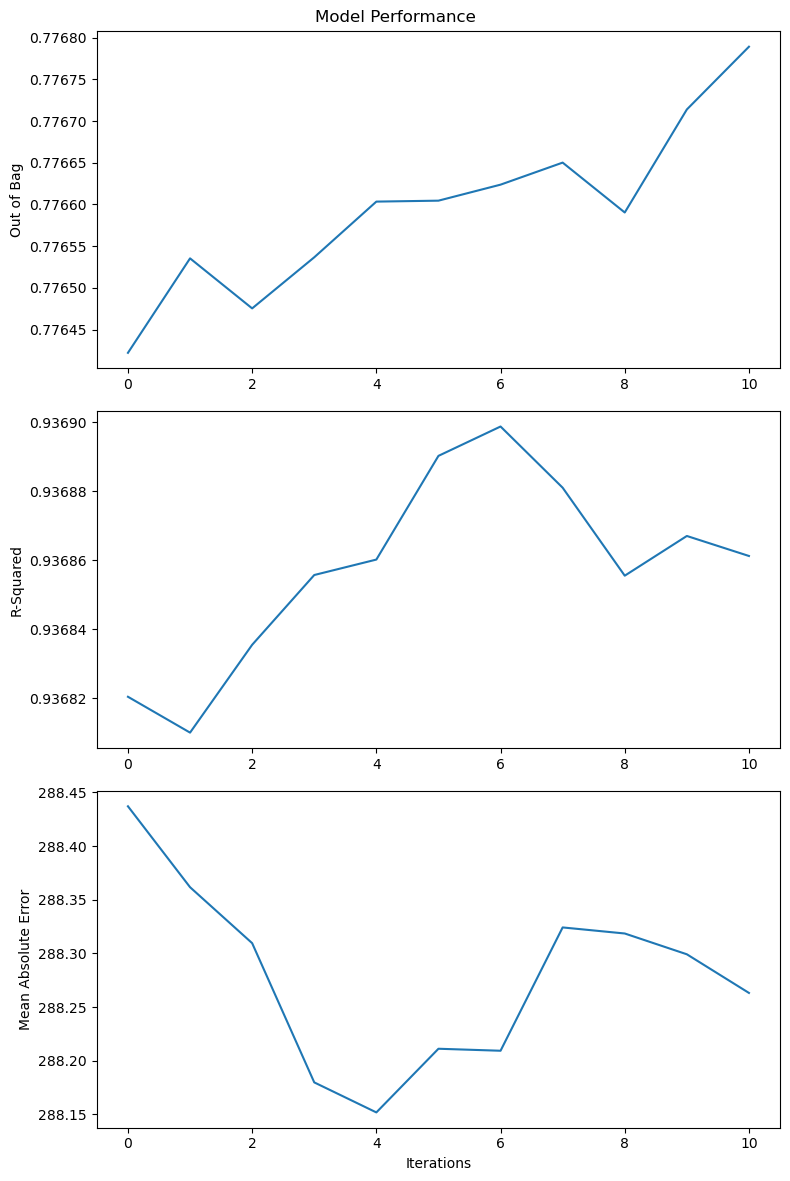

In [265]:
# Create subplots with 3 rows
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot oob_init in the first row
axs[0].plot(oob_fin)
axs[0].set_ylabel('Out of Bag')

# Plot r2_init in the second row
axs[1].plot(r2_fin)
axs[1].set_ylabel('R-Squared')

# Plot mae_init in the third row
axs[2].plot(mae_fin)
axs[2].set_ylabel('Mean Absolute Error')

# Add x-axis label to the last row
axs[2].set_xlabel('Iterations')

# Add a title to the plot
plt.suptitle('Model Performance')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [168]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Random Forest Classifier object
Regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score = True)

# Train the model on the training data
Regressor.fit(X_train.values, y_train.values)

# Make predictions on the testing data
y_pred = Regressor.predict(X_test)



In [169]:
predictions = Regressor.predict(X_train)

mae_train = mean_absolute_error(y_train, predictions)

print(f"${mae_train:.0f} average training error")

$153 average training error


In [170]:
Validation_predictions = Regressor.predict(X_test)

mae = mean_absolute_error(y_test, Validation_predictions)

print(f"${mae:.0f} average validation error")

$292 average validation error


In [171]:
Regressor.oob_score_

0.7762657717870182

#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 3** in the context of the overall objective. 

* After denoicing the data, we were left with 4 features and a target containing 16000 values. We trained 10 random forest regressors on our denoiced data.

* Again we followed the same process as we did in the part 1.
    * This time our model has improved.
    * We are getting oob score around 0.78 which was around 0.22 for initial models.
    * We got mean absolute errors for our models around 290 which initial was around 810.
    * The $R^2$ score has also been increased from 90% to 93%.

### Part 4 - Document the problems (35 marks)

In this part, please use the table below to document your understanding of all the data issues you discovered. Note that **no code** should be included, as that should be covered in **Part 2**. Also, note that even if one line of code fixed a few problems, you should list each problem separately in the table below, so be sure you have investigated the data properly. For example, if the list `[-6, 5, 0, 50]` represents heights of adults, the -6, 0, and 50 would represent three data issues to be included in the table below, even though one line of code may be able to address all of them. 

| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
|  example problem 1  | example explanation    | example fix  | example explanation about why this fix is appropriate   |
|  example problem 2  | example explanation    | example fix  | example explanation about why this fix is appropriate   |


| Data issue discovered | Why is this a problem? | How did you fix it?         | Why is this fix appropriate? |
|-----------------------|------------------------|-----------------------------|------------------------------| 
| Catagical Columns | RandomForestRegressor can not work with catagorical features | Excluded them from the features | The only other option is to encode them but there are so many catagories in each of them and also they are not affecting the model's training much |
| num_desc_words & num_photos | These columns are numerical but are not useful for the predictions of price | Dropped them  | These columns are not impactful in the training of the model thus they are just noice |
| Price < 0 | Rent of an appartment can not be less than 0 | Excluded the least 20% prices in dataset | We found 20% to be proper because it contained rent prices over around 2300 and in real world scenario in New York the rent prices are around 3900$ but as the dataset is old we are considering the prices would be lower |
| Price > 7000 | Appartments with the rent over 7000 is way too costly and also they are residing in above $95%$ of the dataset | Excluded the top $5%$ of the prices | The rent in New York is quite high so it is possible to have high rents on perticular places but not everyone can afford it and there were around 990 values for it |
| Bathroom = 0 | Appartment without bathroom is not possible | Dropped the values using mask | No one would prefer their appartment without bathroom |
| Bathroom > 4.5 | These are outliers and will skew our model | First we thought of IQR but it contained values of just 1 bathrooms then we used mask and removed values which are not is 1 to 4.5 | These values are outliers |
| Bedrooms > 4 | These values are outliers and will skew our model | First we thought of IQR but it was removing many useful values as well thus we used mask and removed values 5 and 6 from bedroom | These extreme values are outliers |
| Latitude values below 40.55 | Not relevant to New York information | Filtered out using a mask | We can directly remove values outside the specified latitude range as we have prior knowledge of New York's coordinates |
| Latitude values above 40.94 | Not relevant to New York information | Filtered out using a mask | We can directly remove values outside the specified latitude range as we have prior knowledge of New York's coordinates |
| Longitude values below -74.10 | Not relevant to New York information | Filtered out using a mask | We can directly remove values outside the specified longitude range as we have prior knowledge of New York's coordinates |
| Longitude values above -73.67 | Not relevant to New York information | Filtered out using a mask | We can directly remove values outside the specified longitude range as we have prior knowledge of New York's coordinates |

In [293]:
Data Issue	Problem Description	Resolution	Justification
Categorical Columns	RandomForestRegressor cannot handle categorical features	Excluded them from the features	The alternative option would be to encode them, but there are numerous categories for each column, and they have minimal impact on the model's training. Hence, excluding them is appropriate.
num_desc_words & num_photos	These columns are not useful for price predictions	Dropped them	These columns do not significantly contribute to the model's training and are considered noise.
Price < 0	Rent for an apartment cannot be less than 0	Excluded the bottom 20% of prices	The chosen threshold of 20% excluded rent prices below approximately $2300. Considering the dataset's age, we assume lower rent prices in New York compared to the current market conditions.
Price > 7000	Apartments with rent over 7000 are outliers	Excluded the top 5% of prices	Rent prices above $7000 are exceptionally high and represent less than 5% of the dataset. These values can skew the model's performance and are not representative of typical rental prices.
Bathroom = 0	Apartments without bathrooms are not valid	Dropped the values using a mask	It is highly unlikely for someone to prefer an apartment without a bathroom, so these values are removed from the dataset.
Bathroom > 4.5	Bathrooms with more than 4.5 are outliers	Removed values using a mask	Values beyond 4.5 bathrooms are considered outliers and could skew the model's training.
Bedrooms > 4	Bedrooms greater than 4 are outliers	Removed values 5 and 6 from bedrooms	Extremely high bedroom counts (5 and 6) are considered outliers and could adversely affect the model's performance.
Latitude < 40.55	Not relevant to New York information	Filtered out using a mask	As we have prior knowledge of New York's coordinates, values outside the specified latitude range are excluded.
Latitude > 40.94	Not relevant to New York information	Filtered out using a mask	As we have prior knowledge of New York's coordinates, values outside the specified latitude range are excluded.
Longitude < -74.10	Not relevant to New York information	Filtered out using a mask	As we have prior knowledge of New York's coordinates, values outside the specified longitude range are excluded.
Longitude > -73.67	Not relevant to New York information	Filtered out using a mask	As we have prior knowledge of New York's coordinates, values outside the specified longitude range are excluded.

SyntaxError: invalid syntax (3951354243.py, line 1)